# Задача 4.3

In [1]:
import scipy.stats as sps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
theta_arr = np.arange(0, 1, 0.01)

$ X = (X_1, ... X_n)$ - выборка из распределения Бернулли, дискретная плотность будет равна:
$$P(X_i = x) = \theta^x (1 - \theta) ^ {(1 - x)}  $$
Найдем эффективную оценку параметра $\theta $:
$$f(X, \theta) = \theta ^ {\sum_{i=1}^n {X_i}} (1 - \theta)^{n - \sum_{i=1}^n {X_i} } $$ 
$$L(X, \theta) = \ln{f (X)} = \ln(\theta) + \left(n - \sum_{i=1}^n {X_i}\right)\ln(1 - \theta)$$
$$U(X, \theta) = \frac{\sum_{i=1}^n {X_i}}{\theta} - \frac{n - \sum_{i=1}^n {X_i}}{1 - \theta} = \frac{n}{\theta(1 - \theta)} (\overline{X} - \theta) $$

Тогда $\overline{X} $ - эффективная оценка параметра $\theta$, информация Фишера равна $\frac{n}{\theta(1 - \theta)} $. Нижняя оценка дисперсии из неравенства Крамера-Рао - $\frac{\theta(1 - \theta)}{n}$

In [3]:
n = 1000

Построим график зависимости нижней оценки дисперсии произвольной несмещенной оценки от $\theta$ :

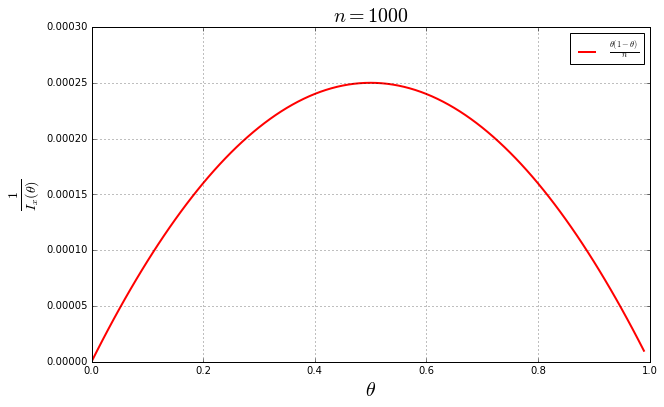

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(theta_arr, theta_arr * (1 - theta_arr) / n, color='red', linewidth=2, label=r'$\frac{\theta(1 - \theta)}{n}$')

plt.legend()
plt.xlim((0, 1))
plt.ylim((0, 0.0003))
plt.xlabel(r'$\theta$', fontsize = 20)
plt.ylabel(r'$\frac{1}{I_x(\theta)}$', fontsize = 20)
plt.title(r'$n = 1000$', fontsize = 20)
plt.grid() 

Дисперсия равна нижней оценке, если оценка эффективная. Из графика можно сделать вывод, что дисперсия эффективной оценки наибольшая при $\theta = 0.5 $. При $\theta = 0$ и $\theta = 1$ дисперсия эффективной оценки равна 0. Так как $D_\theta \widehat{\theta} = E_\theta (\widehat{\theta} - \theta) ^ 2 = 0 $ и $(\widehat{\theta} - \theta) ^ 2$ - неотрицательная случайная величина, по свойствам математического ожидания она равна 0 почти наверное. Значит, при $\theta = 0$ и $\theta = 1$ эффективная оценка почти наверное равна $\theta$.

Для каждого $\theta $ сгенерируем выборку размера n:

In [5]:
sample = np.eye(theta_arr.size, n)
for i in range(theta_arr.size):
    sample[i] = sps.bernoulli.rvs(theta_arr[i], loc = 0, size = n)

Для каждого параметра $\theta$ посчитаем эффективную оценку и бутстрепную оценку дисперсии:

In [6]:
effective_estimation = np.empty(theta_arr.size)
s = np.arange(1, n + 1)
for i in range(theta_arr.size):
    effective_estimation[i] = sample[i, :].mean()

In [7]:
m = 500

In [8]:
var_bootstrap_estimation = np.empty(theta_arr.size)
for i in range(theta_arr.size):
    effective_estimation_bootstrap_sample = np.zeros(m)
    for j in range(m):
        effective_estimation_bootstrap_sample[j] = sps.bernoulli.rvs(effective_estimation[i], loc = 0, size = n).mean()
    var_bootstrap_estimation[i] = effective_estimation_bootstrap_sample.var()

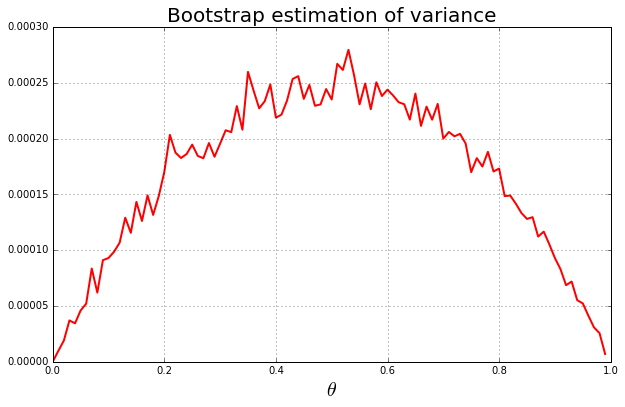

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(theta_arr, var_bootstrap_estimation, color='red', linewidth=2)

plt.legend()
plt.xlim((0, 1))
plt.ylim((0, 0.0003))
plt.xlabel(r'$\theta $', fontsize = 20)
plt.title('Bootstrap estimation of variance', fontsize = 20)
plt.grid() 

Заметим, что значения бутсрепной оценки дисперсии близки к нижней оценке дисперсии из неравенства Крамера-Рао.